In [184]:
import numpy as np
import sys
import pandas as pd
from tensorflow.keras import  layers
from tensorflow.keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, GaussianNoise, GaussianDropout
from keras.layers import Embedding, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from utl import utils
from keras.preprocessing.sequence import pad_sequences

from keras.layers import LSTM, Bidirectional
from matplotlib import pyplot as plt

In [185]:
import pandas as pd  
import numpy as np
import time
from ast import literal_eval
from operator import add
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.utils import resample
plt.style.use('fivethirtyeight')
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from keras.models import model_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D, Input, MaxPooling1D, Flatten, GRU, Conv2D, Reshape, MaxPool2D, Concatenate, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from keras.callbacks import ModelCheckpoint
import os
import gc
import csv
from keras.layers import LeakyReLU
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU,  BatchNormalization
from tensorflow.compat.v1.keras.layers import CuDNNGRU, CuDNNLSTM
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, TimeDistributed
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from tensorflow.keras.layers import InputSpec, Layer
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
use_gpu=True
from keras import backend as K
import keras.initializers
import keras.regularizers
import keras.constraints
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from numpy import dstack
import tensorflow as tf
from keras.layers.core import Lambda

In [186]:
path = 'D:/ACR-SA/Data/IMDB/'

In [187]:
FREQ_DIST_FILE = path+'processed-freqdist.pkl'
BI_FREQ_DIST_FILE = path+'processed-freqdist-bi.pkl'
TRAIN_PROCESSED_FILE =  path+'train.csv'
TEST_PROCESSED_FILE = path+'test.csv'
GLOVE_FILE =  'E:/Pycharm/twitter-sentiment-afg/dataset/glove-seeds.txt'
dim = 300

In [188]:

def get_glove_vectors(vocab):
    """
    Extracts glove vectors from seed file only for words present in vocab.
    """
    print ('Looking for GLOVE seeds')
    glove_vectors = {}
    found = 0
    with open(GLOVE_FILE, 'r',encoding='utf-8') as glove_file:
        for i, line in enumerate(glove_file):
            utils.write_status(i + 1, 0)
            tokens = line.strip().split()
            word = tokens[0]
            if vocab.get(word):
                vector = [float(e) for e in tokens[1:]]
                glove_vectors[word] = np.array(vector)
                found += 1
    print ('\n')
    return glove_vectors


In [189]:

def get_feature_vector(review):
    """
    Generates a feature vector for each reviews where each word is
    represented by integer index based on rank in vocabulary.
    """
    words = review.split()
    feature_vector = []
    for i in range(len(words) - 1):
        word = words[i]
        if vocab.get(word) is not None:
            feature_vector.append(vocab.get(word))
    if len(words) >= 1:
        if vocab.get(words[-1]) is not None:
            feature_vector.append(vocab.get(words[-1]))
    return feature_vector


In [190]:

def process_reviews(csv_file, test_file=True):
    """
    Generates training X, y pairs.
    """
    reviews = []
    labels = []
    print ('Generating feature vectors')
    with open(csv_file, 'r') as csv:
        lines = csv.readlines()
        total = len(lines)
        for i, line in enumerate(lines):
            if test_file:
                review_id, sentiment, review = line.split(',')
            else:
                review_id, sentiment, review = line.split(',')
            feature_vector = get_feature_vector(review)
            if test_file:
                review.append(feature_vector)
                labels.append(int(sentiment))
            else:
                review.append(feature_vector)
                labels.append(int(sentiment))
            utils.write_status(i + 1, total)
    print ('\n')
    return reviews, np.array(labels)


In [191]:
#train = len(sys.argv) == 1
np.random.seed(1337)
vocab_size = 90000
batch_size = 1000
max_length = 200
filters = 600
kernel_size = 3
vocab = utils.top_n_words(FREQ_DIST_FILE, vocab_size, shift=1)


In [ ]:
glove_vectors = get_glove_vectors(vocab)
reviews, labels = process_reviews(TRAIN_PROCESSED_FILE, test_file=False)
embedding_matrix = np.random.randn(vocab_size + 1, dim) * 0.01
# Seed it with GloVe vectors
for word, i in vocab.items():
    glove_vector = glove_vectors.get(word)
    if glove_vector is not None:
        embedding_matrix[i] = glove_vector
reviews = pad_sequences(reviews, maxlen=max_length, padding='post')
shuffled_indices = np.random.permutation(reviews.shape[0])
reviews = reviews[shuffled_indices]
labels = labels[shuffled_indices]

In [ ]:
  def dot_product(x, kernel):
      if K.backend() == 'tensorflow':
          return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
      else:
          return K.dot(x, kernel)

  from keras.layers import Layer

  class AttentionWithContext(keras.layers.Layer):

    def __init__(self,
                W_regularizer=None, u_regularizer=None, b_regularizer=None,
                W_constraint=None, u_constraint=None, b_constraint=None,
                bias=True, **kwargs):

        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.u_regularizer = keras.regularizers.get(u_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.u_constraint = keras.constraints.get(u_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
                'W_regularizer': self.W_regularizer,
                'u_regularizer': self.u_regularizer,
                'b_regularizer': self.b_regularizer,
                'W_constraint': self.W_constraint,
                'u_constraint': self.u_constraint,
                'b_constraint': self.b_constraint,
                'bias': self.bias,
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                initializer=self.init,
                                name='{}_W'.format(self.name),
                                regularizer=self.W_regularizer,
                                constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                    initializer='zero',
                                    name='{}_b'.format(self.name),
                                    regularizer=self.b_regularizer,
                                    constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                initializer=self.init,
                                name='{}_u'.format(self.name),
                                regularizer=self.u_regularizer,
                                constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]
      
  def createHierarchicalAttentionModel(maxSeq, embWeights=None, embeddingSize = None, vocabSize = None,wordRnnSize=100, sentenceRnnSize=100,dropWordEmb = 0.2, dropWordRnnOut = 0.2, dropSentenceRnnOut = 0.5):	
    '''
    maxSeq: maximum size for sentences
    '''
    # Sentence level logic
    wordInp = Input(shape=(maxSeq,),dtype='int32')	
    if embWeights is None:
      x = Embedding(vocabSize, embeddingSize, input_length=maxSeq,trainable=True)(wordInp)
    else:
      x = Embedding(embWeights.shape[0], embWeights.shape[1], weights=[embWeights], trainable=False)(wordInp)    
    
    # if dropWordEmb!=0.0:
    # 	x = Dropout(dropWordEmb)(x)
    wordRNN = Bidirectional(CuDNNGRU(wordRnnSize,return_sequences=True))(x)
    # if dropWordRnnOut>0.0:
    # 	wordRNN = Dropout(dropWordRnnOut)(wordRNN)
    word_dense = TimeDistributed(Dense(200))(wordRNN)
    word_attention = AttentionWithContext()(word_dense)
    modelSentEncoder = Model(wordInp,word_attention)


    # Document level logic
    docInp = Input(shape=(1,maxSeq),dtype='int32')	
    sentEncoder = TimeDistributed(modelSentEncoder)(docInp)	
    sentRNN = Bidirectional(CuDNNGRU(sentenceRnnSize,return_sequences=True))(sentEncoder)
    # if dropSentenceRnnOut!=0:
    # 	sentRNN = Dropout(dropSentenceRnnOut)(sentRNN)
    sent_dense = TimeDistributed(Dense(200))(sentRNN)
    sent_attention = AttentionWithContext()(sent_dense)
    docOut = Dense(1,activation='sigmoid')(sent_attention)
    model = Model(input=docInp,output=docOut)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(model, show_shapes=True, to_file=path+'model/IDBM-han.png')
    return model


In [24]:
x_test_new,y_test_new = process_reviews(TEST_PROCESSED_FILE, test_file=True)
x_test_new = pad_sequences(x_test_new, maxlen=max_length, padding='post')

Generating feature vectors
Processing 5000/5000



In [64]:

dataset_name = 'IDBM'

loaded_our_model1 = load_model(path + 'model/our_model_IMDB.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('Our model loaded')
print('Our model loaded')
loaded_SSBED_model = load_model(path +  'model/SS-BED.hdf5')
print('SS-BED model loaded')
loaded_ARC_model = load_model(path + 'model/ARC_BiGRU.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ARC model loaded')
loaded_ABCDM_model = load_model(path + 'model/ABCDM_model.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('ABCDM model loaded')
loaded_CRNN_model = load_model(path  + 'model/CRNN.hdf5')
print('CRNN model loaded')
loaded_IWV_model = load_model(path  + 'model/IWV.hdf5')
print('IWV model loaded')
loaded_ACBiLSTM_model = load_model(path  + 'model/AC-BiLSTM.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('AC-BiLSTM model loaded')

loaded_LSTM_model = load_model(path  + 'model/LSTM_APP.hdf5')
print('LSTM model loaded')
loaded_CNN_model = load_model(path  + 'model/CNN-Appdata.hdf5')
print('CNN model loaded')

loaded_glovegru_model = load_model(path  + 'model/GloveRGUCNN.hdf5')
print('GloveBigruCNN model loaded')
loaded_glovelstm_model = load_model(path  + 'model/GloveBilSTMCNN.hdf5')
print('GloveBilSTMCNN model loaded')



Our model loaded
Our model loaded
SS-BED model loaded
ARC model loaded
ABCDM model loaded
CRNN model loaded
IWV model loaded
AC-BiLSTM model loaded
LSTM model loaded
CNN model loaded
GloveBigruCNN model loaded
GloveBilSTMCNN model loaded


In [144]:
embedding_dim = 200

def build_model_ACR(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=64):
    file_path = path + "model/our_model_IMDB.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
   
    
    inp = Input(shape = (review.shape[1],), name = 'our-inp')
    inp = Input(shape = (review.shape[1],), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable =True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_2')(inp)
    first=GaussianNoise(0.3)(embd1)
    second=GaussianNoise(0.3)(embd2)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(first)
    
    x4 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_2')(second)
    
    x1_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x1)
    #avg_pool1_cnn = GlobalAveragePooling1D()(x1_cnn)
    max_pool1_cnn = MaxPooling1D(pool_size=2)(x1_cnn)

    x2_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x1)
    #avg_pool2_cnn = GlobalAveragePooling1D()(x2_cnn)
    max_pool2_cnn = MaxPooling1D(pool_size=2)(x2_cnn)

    x1_cnn_c = concatenate([max_pool1_cnn, max_pool2_cnn])#, x1])
    x_lstm1 = Bidirectional(LSTM(units, return_sequences = True))(x1_cnn_c)
    x_lstm11 = Dropout(dr)(x_lstm1)
    x_lstm111 = AttentionWithContext()(x_lstm11)


    x3_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x4)
  
    max_pool3_cnn = MaxPooling1D(pool_size=2)(x3_cnn)

    x4_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x4)
 
    max_pool4_cnn = MaxPooling1D(pool_size=2)(x4_cnn)

    x2_cnn_c = concatenate([max_pool3_cnn, max_pool4_cnn])#, x1])
    x_gru2 = Bidirectional(GRU(units, return_sequences = True))(x2_cnn_c)
    x_gru22 = Dropout(dr)(x_gru2)
    x_gru222 = AttentionWithContext()(x_gru22)


    x = concatenate([x_gru222, x_lstm111])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    
    
    print(model.summary())
    plot_model(model, show_shapes=True, to_file= path + 'model/our_model_IDBM.png')
    history = model.fit(reviews, labels, batch_size = 128, epochs = 50,  validation_split=0.10, 
                        verbose = 1, callbacks = [check_point])
    hist_df = pd.DataFrame(history.history)
    hist_csv_file = path+'model/result_IMDB.csv' 
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    return model

In [145]:
max_len = 200
model = build_model_ACR(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1=2, kernel_size2=3, dense_units=32, dr=0.2, conv_size=64)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
our-inp (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
our-embd_2 (Embedding)          (None, 200, 200)     20000200    our-inp[0][0]                    
__________________________________________________________________________________________________
our-embd_1 (Embedding)          (None, 200, 200)     20000200    our-inp[0][0]                    
__________________________________________________________________________________________________
gaussian_noise_7 (GaussianNoise (None, 200, 200)     0           our-embd_2[0][0]                 
____________________________________________________________________________________________

299/299 [==============================] - 989s 3s/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.9132 - val_accuracy: 0.8790

Epoch 00046: val_accuracy did not improve from 0.90104
Epoch 47/50
299/299 [==============================] - 989s 3s/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.8028 - val_accuracy: 0.8770

Epoch 00047: val_accuracy did not improve from 0.90104
Epoch 48/50
299/299 [==============================] - 988s 3s/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.8545 - val_accuracy: 0.8800

Epoch 00048: val_accuracy did not improve from 0.90104
Epoch 49/50
299/299 [==============================] - 989s 3s/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.8197 - val_accuracy: 0.8806

Epoch 00049: val_accuracy did not improve from 0.90104
Epoch 50/50
299/299 [==============================] - 990s 3s/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.8090 - val_accuracy: 0.8809

Epoch 00050: val_accuracy did not improve from 0.90104


In [154]:
x_test_new,y_test_new = process_reviews(TEST_PROCESSED_FILE, test_file=True)
x_test_new = pad_sequences(x_test_new, maxlen=max_length, padding='post')

Generating feature vectors
Processing 5000/5000



In [155]:

print('Our model loaded')
loaded_acr_model2 = load_model('D:/ACR-SA/Data/IMDB/model/our_model_IMDB.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})

Our model loaded


In [156]:
yhat_acr = loaded_acr_model2.predict(x_test_new)
print('our model complete!')

our model complete!


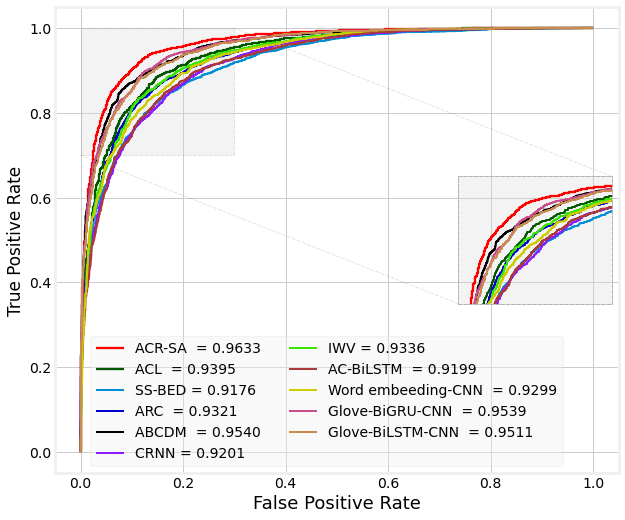

In [157]:

fpr_aclnew, tpr_aclnew, threshold = roc_curve(y_test, yhat_aclupdate)
roc_auc_aclnew = auc(fpr_aclnew, tpr_aclnew)

fpr_our2, tpr_our2, threshold2 = roc_curve(y_test_new, yhat_acr)
roc_auc_our2 = auc(fpr_our2, tpr_our2)

fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)

fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
roc_auc_arc = auc(fpr_arc, tpr_arc)

fpr_abcdm, tpr_abcdm, threshold = roc_curve(y_test, yhat_abcdm)
roc_auc_abcdm = auc(fpr_abcdm, tpr_abcdm)

fpr_crn, tpr_crn, threshold = roc_curve(y_test, yhat_crnn)
roc_auc_crn = auc(fpr_crn, tpr_crn)

fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
roc_auc_iwv = auc(fpr_iwv, tpr_iwv)

fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)

fpr_lstm, tpr_lstm, threshold = roc_curve(y_test, yhat_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_cnn, tpr_cnn, threshold = roc_curve(y_test, yhat_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_gru, tpr_gru, threshold = roc_curve(y_test, yhat_gru)
roc_auc_gru = auc(fpr_gru, tpr_gru)

fpr_bilstm, tpr_bilstm, threshold = roc_curve(y_test, yhat_bilstm)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)

#############################3333
fpr_stacked, tpr_stacked, threshold = roc_curve(y_test, yhat_our2)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
#################################3
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
plt.gcf().set_facecolor('white')

ax.plot(fpr_our2, tpr_our2, label='ACR-SA  = %0.4f' % roc_auc_our2, linewidth=2.3, color = 'red')
ax.plot(fpr_aclnew, tpr_aclnew, label='ACL  = %0.4f' % roc_auc_aclnew, linewidth=2.3, color = '#005700')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED = %0.4f' % roc_auc_ssbed, linewidth=2)
ax.plot(fpr_arc, tpr_arc, label='ARC  = %0.4f' % roc_auc_arc, linewidth=2, color = '#0000cc')
ax.plot(fpr_abcdm, tpr_abcdm, label='ABCDM  = %0.4f' % roc_auc_abcdm, linewidth=2, color = 'black')
ax.plot(fpr_crn, tpr_crn, label='CRNN = %0.4f' % roc_auc_crn, linewidth=2, color = '#8c1aff')
ax.plot(fpr_iwv, tpr_iwv, label='IWV = %0.4f' % roc_auc_iwv, linewidth=2, color = '#39e600')
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM  = %0.4f' % roc_auc_acbilstm, linewidth=2, color = '#ac3939')
ax.plot(fpr_cnn, tpr_cnn, label='Word embeeding-CNN  = %0.4f' % roc_auc_cnn, linewidth=2, color = '#cccc00')
ax.plot(fpr_gru, tpr_gru, label='Glove-BiGRU-CNN  = %0.4f' % roc_auc_gru, linewidth=2, color = '#c94f8a')
ax.plot(fpr_bilstm, tpr_bilstm, label='Glove-BiLSTM-CNN  = %0.4f' % roc_auc_bilstm, linewidth=2, color = '#c98c4f')

#ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax.set_facecolor('white')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.4)


axins = zoomed_inset_axes(ax, 1, loc = 'center right') # zoom-factor: 2.5, location: upper-left


axins.plot(fpr_our2, tpr_our2, label='ACR-SA  = %0.4f' % roc_auc_our2, linewidth=2.3, color = 'red')
axins.plot(fpr_aclnew, tpr_aclnew, label='ACL (area = %0.3f' % roc_auc_aclnew, linewidth=2, color = '#005700')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED = %0.3f' % roc_auc_ssbed, linewidth=2)
axins.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f' % roc_auc_arc, linewidth=2, color = '#0000cc')
axins.plot(fpr_abcdm, tpr_abcdm, label='ABCDM = %0.3f' % roc_auc_abcdm, linewidth=2, color = 'black')
axins.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f' % roc_auc_crn, linewidth=2, color = '#8c1aff')
axins.plot(fpr_iwv, tpr_iwv, label='IWV  = %0.3f' % roc_auc_iwv, linewidth=2, color = '#39e600')
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM  = %0.3f' % roc_auc_acbilstm, linewidth=2, color = '#ac3939')
axins.plot(fpr_cnn, tpr_cnn, label='Word embeeding-CNN  = %0.3f' % roc_auc_cnn, linewidth=2, color = '#cccc00')
axins.plot(fpr_gru, tpr_gru, label='Glove-BiGRU-CNN  = %0.4f' % roc_auc_gru, linewidth=2, color = '#c94f8a')
axins.plot(fpr_bilstm, tpr_bilstm, label='Glove-BiLSTM-CNN  = %0.4f' % roc_auc_bilstm, linewidth=2, color = '#c98c4f')

axins.patch.set_facecolor('#d9d9d9')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1') 
axins.spines['left'].set_linestyle('--')  

x1, x2, y1, y2 = 0, 0.3, 0.7, 1 # specify the limits
#x1, x2, y1, y2 = 0.2, 0.5, 0.6, 0.9 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="#d9d9d9", ec="0.3", alpha = 0.3, ls = '-.')

plt.savefig(path+ dataset_name + '-AUC7_ibdm12PJ2forusereal300.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)

In [158]:
classifiers = [yhat_acr]
classifiers_name = [ 'ACR -','ACR +']#SS-BED', 'CNN']#
dataset_name = 'airline'

y_test_list = y_test_new.tolist()
results = []
for c,i in zip(classifiers,range(len(classifiers))):
  labels = (c > 0.5).astype(np.int)
  labels = labels.flatten().tolist()
  
  data = []
  cnf_matrix = confusion_matrix(y_test_list, labels)

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  F1 = (2 * TPR * PPV)/(TPR + PPV)
  data.append(TPR)
  data.append(TNR)
  data.append(PPV)
  data.append(F1)
  data.append(ACC)
  
  results.append([round(d[0],4) for d in data])
  results.append([round(d[1],4) for d in data])

print("\t Recall, Specifity, Precision, F1, Accuracy")
for r,name in zip(results,classifiers_name):
  print(name,': ',r)
with open(path+"Results10new2002.txt", "w") as filehandle:  
    filehandle.writelines(f"{name} %s\n" %r for r,name in zip(results,classifiers_name))

	 Recall, Specifity, Precision, F1, Accuracy
ACR - :  [0.8967, 0.9045, 0.9028, 0.8997, 0.9006]
ACR + :  [0.9045, 0.8967, 0.8984, 0.9014, 0.9006]


In [176]:
path = 'D:/ACR-SA/Data/IMDB/'

In [177]:
SEED = 2000

csv = path+'model/result_IMDB.csv' 


my_df = pd.read_csv(csv, encoding = 'latin-1')


In [203]:
embedding_dim = 200

def build_model_ACR(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=64):
    file_path = path + "model/our_model_IMDB-GN.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
   
    
    inp = Input(shape = (reviews.shape[1],), name = 'our-inp')
    inp = Input(shape = (reviews.shape[1],), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable =True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_2')(inp)
    first=GaussianNoise(0.3)(embd1)
    second=GaussianNoise(0.3)(embd2)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(first)
    
    x4 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_2')(second)
    
    x1_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(embd1)

    max_pool1_cnn = MaxPooling1D(pool_size=2)(x1_cnn)

    x2_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(embd1)
    max_pool2_cnn = MaxPooling1D(pool_size=2)(x2_cnn)

    x1_cnn_c = concatenate([max_pool1_cnn, max_pool2_cnn])#, x1])
    x_lstm1 = Bidirectional(LSTM(units, return_sequences = True))(x1_cnn_c)
    x_lstm11 = Dropout(dr)(x_lstm1)
    x_lstm111 = AttentionWithContext()(x_lstm11)


    x3_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(embd2)
    max_pool3_cnn = MaxPooling1D(pool_size=2)(x3_cnn)

    x4_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(embd2)
    max_pool4_cnn = MaxPooling1D(pool_size=2)(x4_cnn)

    x2_cnn_c = concatenate([max_pool3_cnn, max_pool4_cnn])#, x1])
    x_gru2 = Bidirectional(GRU(units, return_sequences = True))(x2_cnn_c)
    x_gru22 = Dropout(dr)(x_gru2)
    x_gru222 = AttentionWithContext()(x_gru22)


    x = concatenate([x_gru222, x_lstm111])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
  
    
    print(model.summary())
    plot_model(model, show_shapes=True, to_file= path + 'model/our_model.png')
    history = model.fit(reviews, labels, batch_size = 128, epochs = 50,  validation_split=0.10, 
                        verbose = 1, callbacks = [check_point])
    hist_df = pd.DataFrame(history.history)
    hist_csv_file = path+'model/our_model_result_IMDB-GN.csv' 
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    return model

In [204]:
max_len = 200
model = build_model_ACR(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1=2, kernel_size2=3, dense_units=32, dr=0.2, conv_size=64)

C:\Users\kamyab\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
our-inp (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
our-embd_2 (Embedding)          (None, 200, 200)     20000200    our-inp[0][0]                    
__________________________________________________________________________________________________
our-embd_1 (Embedding)          (None, 200, 200)     20000200    our-inp[0][0]                    
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 199, 64)      25664       our-embd_2[0][0]                 
____________________________________________________________________________________________


Epoch 00009: val_accuracy did not improve from 0.89304
Epoch 10/50
299/299 [==============================] - 1445s 5s/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.6395 - val_accuracy: 0.8807

Epoch 00010: val_accuracy did not improve from 0.89304
Epoch 11/50
299/299 [==============================] - 1438s 5s/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.7747 - val_accuracy: 0.8582

Epoch 00011: val_accuracy did not improve from 0.89304
Epoch 12/50
299/299 [==============================] - 1454s 5s/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.7087 - val_accuracy: 0.8766

Epoch 00012: val_accuracy did not improve from 0.89304
Epoch 13/50
299/299 [==============================] - 1433s 5s/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.7389 - val_accuracy: 0.8756

Epoch 00013: val_accuracy did not improve from 0.89304
Epoch 14/50
299/299 [==============================] - 1439s 5s/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.8640 - val_accuracy: 0.

In [213]:
SEED = 2000
csv = path+'model/our_model_result_IMDB-GN.csv' 


my_df3 = pd.read_csv(csv, encoding = 'latin-1')

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001DE3F3018B0>
Traceback (most recent call last):
  File "C:\Users\kamyab\anaconda3\lib\weakref.py", line 345, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


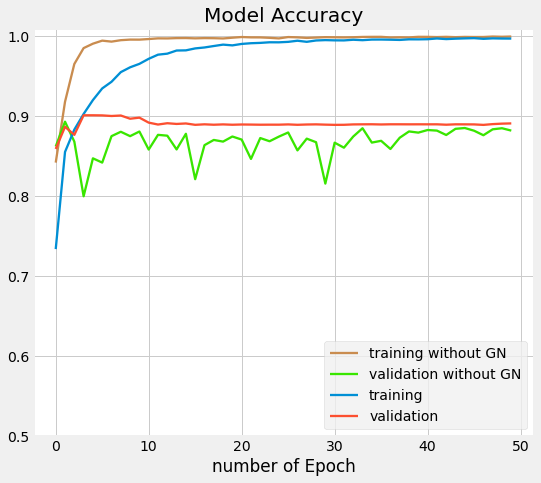

In [214]:
fig, ax = plt.subplots(figsize=(8,7))
ax.set_facecolor('white')


ax.plot(my_df3.accuracy, label="training without GN",linewidth=2.3, color = '#c98c4f')
if my_df3.accuracy is not None:
    ax.plot(my_df3.val_accuracy, label="validation without GN",linewidth=2.3, color = '#39e600')
ax.set_title('Model Accuracy')
ax.set_xlabel('number of Epoch')
ax.legend(loc='lower right')

ax.plot(my_df.accuracy, label="training",linewidth=2.3)
if my_df.accuracy is not None:
    ax.plot(my_df.val_accuracy, label="validation",linewidth=2.3)
ax.set_title('Model Accuracy')
ax.set_xlabel('number of Epoch')
ax.legend(loc='lower right')

ax.set_ylim(bottom=0.5)
ax.set_ylim(top=1.01)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.savefig(path+'our_model_result.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)